In [1]:
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import  pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

from sklearn.feature_selection import SelectKBest

In [2]:
df = pd.read_csv('S&P500_2017.csv')
df = df.drop(['Date'],axis=1)
df= df.drop(df.select_dtypes(['object']).columns,axis=1)
df=df.fillna(df.mean())
dfm = df.pct_change()
dfm.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.013121,0.008639,0.008206,-0.001119,0.014100,0.024816,0.007938,0.002404,0.006378,-0.002069,...,0.003446,-0.007279,-0.011002,0.008188,0.037736,0.014904,0.003639,0.009194,0.014358,0.009703
2,-0.011890,-0.017345,-0.000698,0.005085,0.007584,-0.011576,0.008638,-0.014991,0.016996,-0.014373,...,-0.011358,-0.012108,-0.014907,-0.013029,-0.004196,-0.009129,0.003310,0.006425,-0.016210,-0.003327
3,0.031156,0.006973,-0.013090,0.011148,0.000314,0.013384,0.027204,0.011392,0.022566,0.003926,...,-0.001069,0.019334,-0.000565,-0.000686,-0.015449,-0.007010,0.012097,0.000095,0.006498,0.003152
4,0.003126,0.018827,-0.000589,0.009159,0.006584,0.008019,-0.000981,-0.011178,0.002493,0.004749,...,-0.016849,0.000169,-0.016497,0.003088,-0.005706,-0.004236,0.002794,0.019436,-0.010837,-0.002773


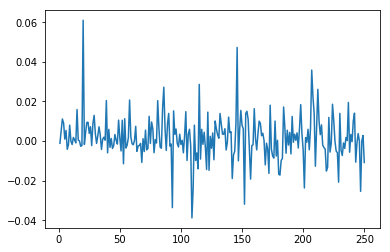

In [36]:
plt.plot(dfm.AAPL)

In [8]:
#dfm = dfm.drop(['WELL','BKNG','BHF'],axis=1).copy()
dfm = dfm.drop([0])

In [9]:
dfm.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
1,0.013121,0.008639,0.008206,-0.001119,0.014100,0.024816,0.007938,0.002404,0.006378,-0.002069,...,0.003446,-0.007279,-0.011002,0.008188,0.037736,0.014904,0.003639,0.009194,0.014358,0.009703
2,-0.011890,-0.017345,-0.000698,0.005085,0.007584,-0.011576,0.008638,-0.014991,0.016996,-0.014373,...,-0.011358,-0.012108,-0.014907,-0.013029,-0.004196,-0.009129,0.003310,0.006425,-0.016210,-0.003327
3,0.031156,0.006973,-0.013090,0.011148,0.000314,0.013384,0.027204,0.011392,0.022566,0.003926,...,-0.001069,0.019334,-0.000565,-0.000686,-0.015449,-0.007010,0.012097,0.000095,0.006498,0.003152
4,0.003126,0.018827,-0.000589,0.009159,0.006584,0.008019,-0.000981,-0.011178,0.002493,0.004749,...,-0.016849,0.000169,-0.016497,0.003088,-0.005706,-0.004236,0.002794,0.019436,-0.010837,-0.002773
5,-0.000831,0.029737,0.002300,0.001008,-0.002180,-0.007604,0.013500,0.000522,-0.002855,0.005699,...,0.004897,-0.008974,-0.012753,-0.005131,0.008608,-0.004659,0.005882,0.062336,0.015384,-0.000371


In [10]:
X = pd.DataFrame(columns=dfm.columns)
X = X.T
X['Mean'] = dfm.mean()
X['Std'] = dfm.std()
X['Skew'] = dfm.skew()
X['Kurt'] = dfm.kurt()

In [11]:
X= X.fillna(X.mean())
X.head()

,Mean,Std,Skew,Kurt
A,0.001551,0.010403,0.630626,3.088352
AAL,0.000664,0.018060,-0.001023,1.116399
AAP,-0.001821,0.024860,-1.236750,25.504131
AAPL,0.001632,0.011113,0.579141,4.925315
ABBV,0.001958,0.011061,0.971471,5.682703


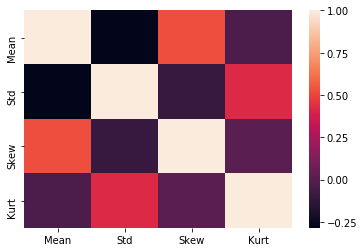

In [12]:
sns.heatmap(X.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52d3661d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd52d1a7dd0>]], dtype=object)

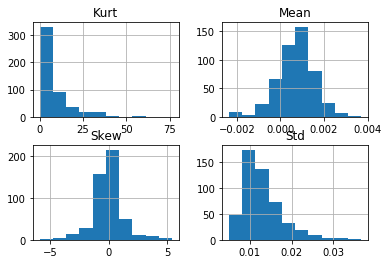

In [13]:
X.hist()

In [14]:
sc = StandardScaler()
sc.fit(X)
mm = MinMaxScaler()
mm.fit(X)
pca = PCA()
pca.fit(X)
mds = MDS()
mds.fit(X)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [15]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [16]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [17]:
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

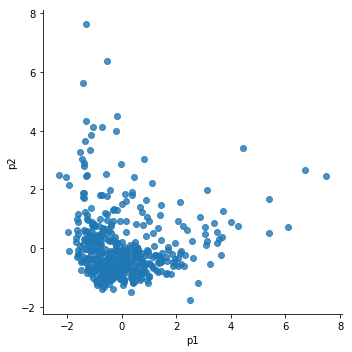

In [18]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

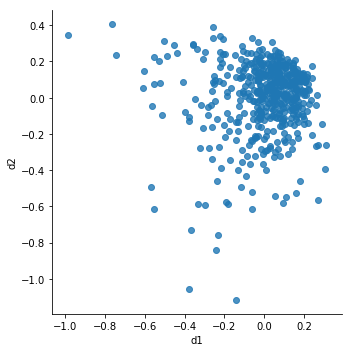

In [19]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [20]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xmm)
    lst_inertia.append(cl.inertia_)

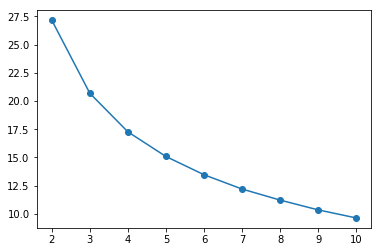

In [21]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [24]:
cl = GaussianMixture(n_components=4)
cl.fit(Xmm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
Xp['cl']=Xmm['cl'] = Xm['cl']=Xp['cl'] =X['cl']= cl.predict(Xmm)

In [27]:
sk = SelectKBest(k=4)
sk.fit(Xmm[['Mean','Std','Skew','Kurt']],Xmm['cl'])

SelectKBest(k=4, score_func=<function f_classif at 0x7fd53935b9b0>)

In [29]:
var_best= [x for x,y in zip(['Mean','Std','Skew','Kurt'],sk.get_support()) if y]
var_best

['Mean', 'Std', 'Skew', 'Kurt']

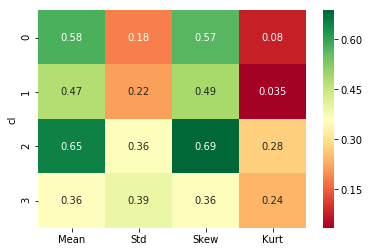

In [30]:
sns.heatmap(Xmm[['cl']+var_best].groupby('cl').mean(),annot=True,cmap='RdYlGn')

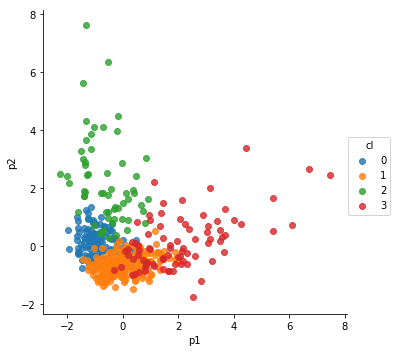

In [31]:
sns.lmplot(data=Xp,x='p1',y='p2',hue='cl',fit_reg=False)

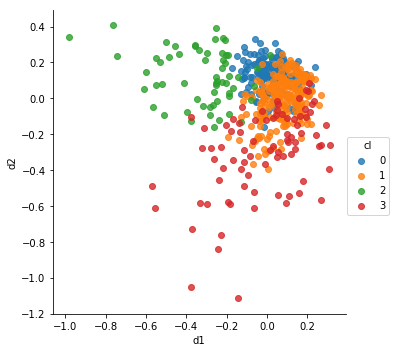

In [32]:
sns.lmplot(data=Xm,x='d1',y='d2',hue='cl',fit_reg=False)

In [33]:
N=pd.read_csv('Sectores.csv')
x = X.merge(N,left_index=True,right_on='Symbol',how='inner')
x.head()

,Mean,Std,Skew,Kurt,cl,Symbol,Name,Sector
0,0.001551,0.010403,0.630626,3.088352,0,A,Agilent Technologies Inc,Health Care
1,0.000664,0.018060,-0.001023,1.116399,1,AAL,American Airlines Group,Industrials
2,-0.001821,0.024860,-1.236750,25.504131,3,AAP,Advance Auto Parts,Consumer Discretionary
3,0.001632,0.011113,0.579141,4.925315,0,AAPL,Apple Inc.,Information Technology
4,0.001958,0.011061,0.971471,5.682703,0,ABBV,AbbVie,Health Care


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd525831190>]], dtype=object)

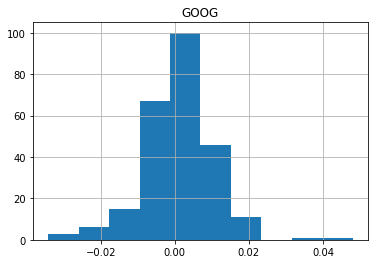

In [67]:
dfm[x.loc[x['cl']==0].sample()['Symbol']].hist()